In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')

**Data Overview:**

The dataset includes key columns such as Date, Product Category, Price per Unit, and Total Amount.
Data cleaning was performed, including conversion of the Date column to a datetime format.

**Time Series Analysis:**

A time series analysis was conducted for daily and monthly Total Amount sales, revealing trends and seasonality.
Seasonal decomposition identified patterns, trends, and irregularities in the sales data.

**Category-Wise Sales:**

A breakdown of Total Amount sales by Product Category showed the contribution of each category over time.
Monthly and yearly trends in sales across categories were visualized, indicating potential seasonality or growth trends.

**Key Insights:**

Certain months or years may have experienced significant spikes or dips in sales, which could indicate seasonal effects, promotional campaigns, or other external factors.


**Actionable Recommendations**
- Focus on High-Performing Categories:

Invest in marketing and inventory for product categories contributing the most to overall sales.
Analyze customer preferences for high-performing categories and expand product offerings in similar segments.

- Seasonal Campaigns:

Plan targeted sales campaigns around periods of seasonal spikes identified in the analysis.
Ensure sufficient inventory for high-demand products during peak months.

- Diversify Low-Performing Categories:

For underperforming categories, investigate potential reasons such as pricing, competition, or lack of customer interest.
Introduce discounts, bundle offers, or promotional efforts to improve their sales.

- Long-Term Planning:

Use the identified yearly trends to forecast future sales and set realistic targets.
Allocate resources effectively for categories and timeframes with the highest growth potential.
- Investigate Anomalies:

Analyze periods of unexpected sales dips or spikes to identify root causes, such as external market conditions, stockouts, or pricing changes.
Use this information to prevent similar issues in the future.
- Customer Segmentation:

If customer-level data is available, segment the audience to tailor marketing efforts based on purchase patterns.
Personalize offers for loyal customers or frequent buyers of specific product categories.


In [2]:
sale = pd.read_csv("retail_sales_dataset.csv")

In [3]:
sale.to_excel("reatail_sale.xlsx")

In [4]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
sale

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [6]:
sale.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [7]:
sale.mean(numeric_only=True)

,0
Transaction ID,500.500
Age,41.392
Quantity,2.514
Price per Unit,179.890
Total Amount,456.000


In [8]:
sale.median(numeric_only=True)

,0
Transaction ID,500.5
Age,42.0
Quantity,3.0
Price per Unit,50.0
Total Amount,135.0


In [9]:
sale.mode(numeric_only=True)

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
0,1,43.0,4.0,50.0,50.0
1,2,64.0,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
995,996,NaN,NaN,NaN,NaN
996,997,NaN,NaN,NaN,NaN
997,998,NaN,NaN,NaN,NaN
998,999,NaN,NaN,NaN,NaN


In [10]:
sale[["Date" , "Product Category" , "Price per Unit","Total Amount"]]

,Date,Product Category,Price per Unit,Total Amount
0,2023-11-24,Beauty,50,150
1,2023-02-27,Clothing,500,1000
2,2023-01-13,Electronics,30,30
3,2023-05-21,Clothing,500,500
4,2023-05-06,Beauty,50,100
...,...,...,...,...
995,2023-05-16,Clothing,50,50
996,2023-11-17,Beauty,30,90
997,2023-10-29,Beauty,25,100
998,2023-12-05,Electronics,50,150


In [11]:
sale[sale["Date"].duplicated()]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
25,26,2023-10-07,CUST026,Female,28,Electronics,2,500,1000
34,35,2023-08-05,CUST035,Female,58,Beauty,3,300,900
36,37,2023-05-23,CUST037,Female,18,Beauty,3,25,75
40,41,2023-02-22,CUST041,Male,34,Clothing,2,25,50
41,42,2023-02-17,CUST042,Male,22,Clothing,3,300,900
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [12]:
sale["Date"] = pd.to_datetime(sale["Date"])
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [13]:
sale.set_index("Date", inplace=True)

sales_time_series = sale.resample("D")["Total Amount"].sum()


Text(0.5, 1.0, 'Sales Time Series')

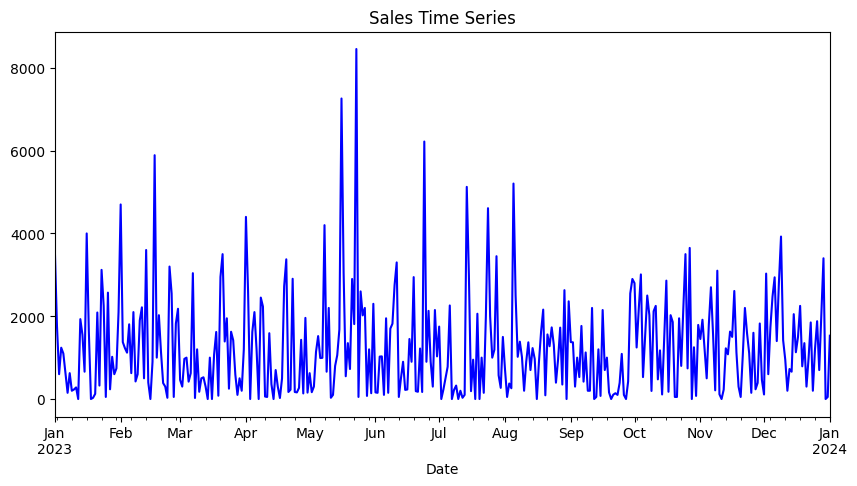

In [14]:
plt.figure(figsize = (10,5))
sales_time_series.plot(kind = "line" , color = "blue")
plt.title("Sales Time Series")

<Axes: xlabel='Date'>

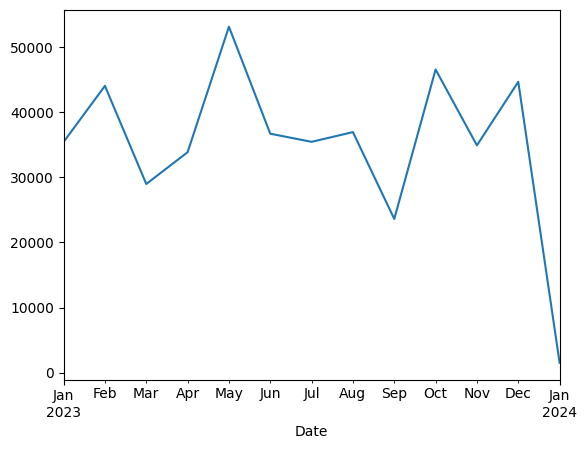

In [15]:
sale.resample("M")["Total Amount"].sum().plot(kind = "line")

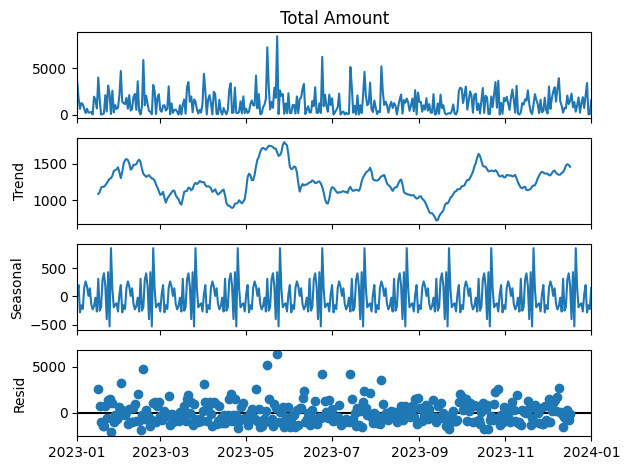

In [16]:


decompose_result = seasonal_decompose(sales_time_series, model="additive", period=30)
decompose_result.plot()
plt.show()


<Axes: xlabel='Product Category'>

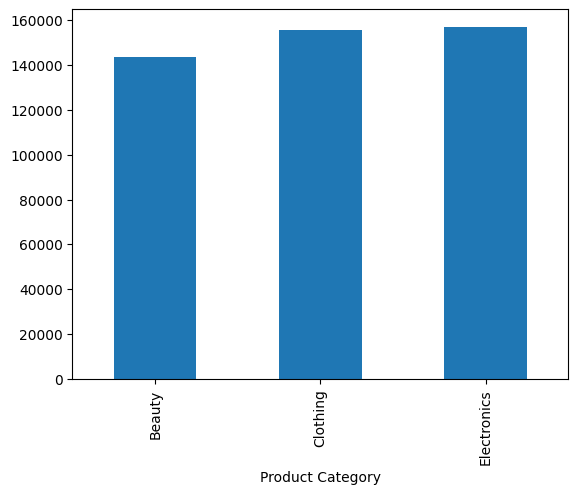

In [17]:
sale.groupby("Product Category")["Total Amount"].sum().plot(kind = "bar")

In [18]:
sale = sale.reset_index()
sale["year_month"] = sale["Date"].dt.to_period("M")

monthly_category_sales = sale.groupby(["year_month", "Product Category"])["Total Amount"].sum().reset_index()


In [19]:
monthly_category_sales

,year_month,Product Category,Total Amount
0,2023-01,Beauty,12430
1,2023-01,Clothing,13125
2,2023-01,Electronics,9895
3,2023-02,Beauty,14035
4,2023-02,Clothing,14560
5,2023-02,Electronics,15465
6,2023-03,Beauty,10545
7,2023-03,Clothing,15065
8,2023-03,Electronics,3380
9,2023-04,Beauty,11905


In [20]:
monthly_category_sales["year_month"] = monthly_category_sales["year_month"].astype(str)


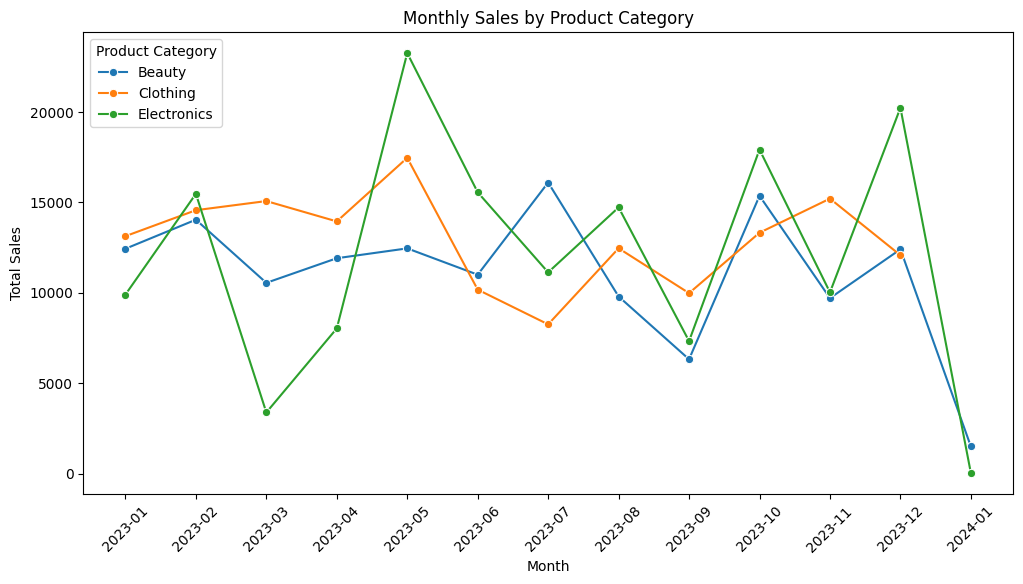

In [21]:


plt.figure(figsize=(12, 6))
sns.lineplot(data = monthly_category_sales, x="year_month", y="Total Amount", hue="Product Category", marker="o")
plt.title("Monthly Sales by Product Category")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.show()


In [22]:
sale["yearly"] = sale["Date"].dt.to_period("y")

yearly_category_sales = sale.groupby(["yearly", "Product Category"])["Total Amount"].sum().reset_index()

In [23]:
yearly_category_sales["yearly"] = yearly_category_sales["yearly"].astype(int)


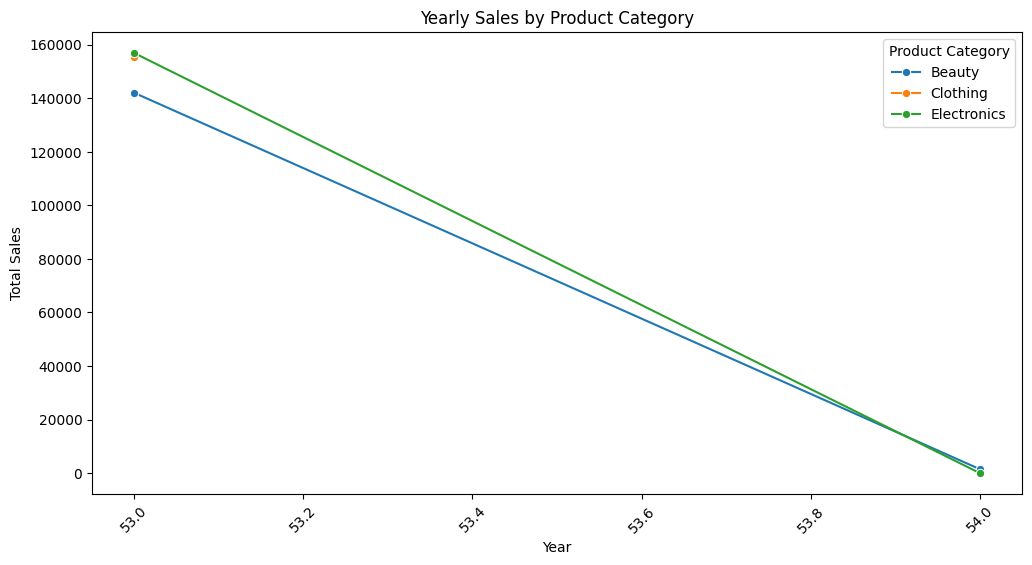

In [24]:


plt.figure(figsize=(12, 6))
sns.lineplot(data = yearly_category_sales, x="yearly", y="Total Amount", hue="Product Category", marker="o")
plt.title("Yearly Sales by Product Category")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.show()


In [25]:
sale.groupby(["Date" , "Product Category"])["Total Amount"].sum().sort_values(ascending=False).head(10)

,,Total Amount
Date,Product Category,
2023-06-24,Electronics,5200
2023-05-16,Electronics,5100
2023-05-23,Electronics,5030
2023-12-09,Electronics,3725
2023-07-14,Beauty,3690
2023-02-13,Beauty,3525
2023-02-01,Clothing,3500
2023-10-25,Beauty,3500
2023-12-29,Beauty,3300


In [26]:
sale["Date"].sort_values(ascending=True)

,Date
521,2023-01-01
179,2023-01-01
558,2023-01-01
302,2023-01-02
978,2023-01-02
...,...
232,2023-12-29
804,2023-12-29
856,2023-12-31
210,2024-01-01


In [27]:
sale[sale["Date"] == "2023-06-24"]

,Date,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year_month,yearly
35,2023-06-24,36,CUST036,Male,52,Beauty,3,300,900,2023-06,2023
156,2023-06-24,157,CUST157,Male,62,Electronics,4,500,2000,2023-06,2023
795,2023-06-24,796,CUST796,Male,43,Beauty,4,30,120,2023-06,2023
838,2023-06-24,839,CUST839,Female,20,Electronics,4,300,1200,2023-06,2023
926,2023-06-24,927,CUST927,Male,43,Electronics,4,500,2000,2023-06,2023


.Customer and Product Analysis: Analyze customer demographics and purchasing behavior.

In [28]:
sale

,Date,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year_month,yearly
0,2023-11-24,1,CUST001,Male,34,Beauty,3,50,150,2023-11,2023
1,2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000,2023-02,2023
2,2023-01-13,3,CUST003,Male,50,Electronics,1,30,30,2023-01,2023
3,2023-05-21,4,CUST004,Male,37,Clothing,1,500,500,2023-05,2023
4,2023-05-06,5,CUST005,Male,30,Beauty,2,50,100,2023-05,2023
...,...,...,...,...,...,...,...,...,...,...,...
995,2023-05-16,996,CUST996,Male,62,Clothing,1,50,50,2023-05,2023
996,2023-11-17,997,CUST997,Male,52,Beauty,3,30,90,2023-11,2023
997,2023-10-29,998,CUST998,Female,23,Beauty,4,25,100,2023-10,2023
998,2023-12-05,999,CUST999,Female,36,Electronics,3,50,150,2023-12,2023


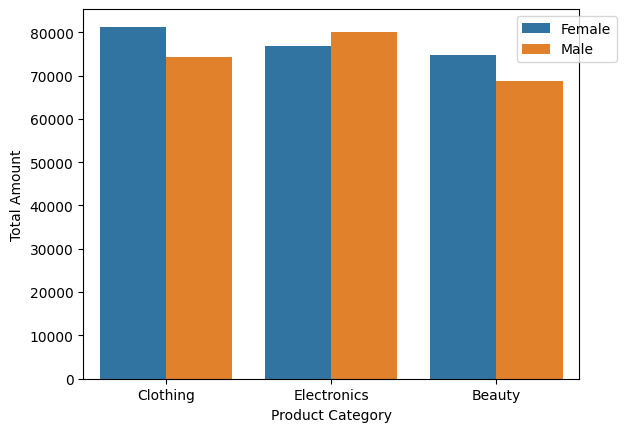

In [29]:
df = sale.groupby(["Gender" , "Product Category"])["Total Amount"].sum().sort_values(ascending=False)
df = df.reset_index()
sns.barplot(data = df , x = "Product Category" , y = "Total Amount" , hue = "Gender")
plt.legend(bbox_to_anchor = (1.09 , 1))

In [30]:
clothing = sale[sale["Product Category"] =="Clothing" ]

In [31]:
clothing.groupby("Gender")["Age"].max()

,Age
Gender,
Female,64
Male,64


In [32]:
clothing.groupby("Gender")["Age"].mean()

,Age
Gender,
Female,43.166667
Male,40.751412


In [33]:
Electronics = sale[sale["Product Category"] == "Electronics" ]

In [34]:
Electronics.groupby("Gender")["Age"].min()

,Age
Gender,
Female,18
Male,19


In [35]:
sale.groupby(["Gender", "Product Category"])["Quantity"].mean()

Gender  Product Category
Female  Beauty              2.518072
        Clothing            2.534483
        Electronics         2.582353
Male    Beauty              2.503546
        Clothing            2.559322
        Electronics         2.383721
Name: Quantity, dtype: float64